In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the notebook's directory
notebook_dir = os.path.abspath('')

# Construct the path to the .csv file
csv_path = os.path.join(notebook_dir, "data", "WVS_Cross-National_Wave_7_csv_v6_0.csv")

# Load the .csv file
df = pd.read_csv(csv_path, low_memory=False)

# Display the first few rows
df.head()

In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check column names
print(df.columns.tolist())

# Check basic info about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Dataset shape: (97220, 613)
['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY', 'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW', 'S007', 'J_INTDATE', 'FW_START', 'FW_END', 'K_TIME_START', 'K_TIME_END', 'K_DURATION', 'Q_MODE', 'N_REGION_ISO', 'N_REGION_WVS', 'N_REGION_NUTS2', 'N_REG_NUTS1', 'N_TOWN', 'G_TOWNSIZE', 'G_TOWNSIZE2', 'H_SETTLEMENT', 'H_URBRURAL', 'I_PSU', 'O1_LONGITUDE', 'O2_LATITUDE', 'L_INTERVIEWER_NUMBER', 'S_INTLANGUAGE', 'LNGE_ISO', 'E_RESPINT', 'F_INTPRIVACY', 'E1_LITERACY', 'W_WEIGHT', 'S018', 'PWGHT', 'S025', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q33_3', 'Q34', 'Q34_3', 'Q35', 'Q35_3', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61

In [3]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))

        A_WAVE        A_YEAR  A_STUDY     B_COUNTRY     C_COW_NUM  \
count  97220.0  97220.000000  97220.0  97220.000000  97220.000000   
mean       7.0   2019.132082      2.0    447.872146    476.555153   
std        0.0      1.601004      0.0    256.491312    288.386918   
min        7.0   2017.000000      2.0     20.000000      2.000000   
25%        7.0   2018.000000      2.0    218.000000    201.000000   
50%        7.0   2018.000000      2.0    422.000000    552.000000   
75%        7.0   2020.000000      2.0    688.000000    714.000000   
max        7.0   2023.000000      2.0    909.000000    920.000000   

        D_INTERVIEW          S007     J_INTDATE       FW_START         FW_END  \
count  9.722000e+04  9.722000e+04  9.722000e+04   97220.000000   97220.000000   
mean   4.479431e+08  4.485726e+08  1.905207e+07  201901.606881  201919.989683   
std    2.564912e+08  2.564602e+08  4.658281e+06     160.980181     160.412353   
min    2.007000e+07  2.072000e+07 -5.000000e+00  20170

In [4]:
# Example: Explore columns related to economic values
economic_columns = ['Q46', 'Q47', 'Q48', 'Q49', 'Q50']  # Replace with actual column names
print(df[economic_columns].head())

# Example: Explore columns related to societal values
societal_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']  # Replace with actual column names
print(df[societal_columns].head())

   Q46  Q47  Q48  Q49  Q50
0    1    3   10   10    5
1    1    1    9    9    9
2    2    1    9    9    8
3    2    2    9    8    6
4    2    2    8    7    7
   Q1  Q2  Q3  Q4  Q5
0   1   1   1   3   1
1   1   1   1   4   1
2   1   2   2   2   3
3   1   1   1   4   2
4   1   1   1   3   1


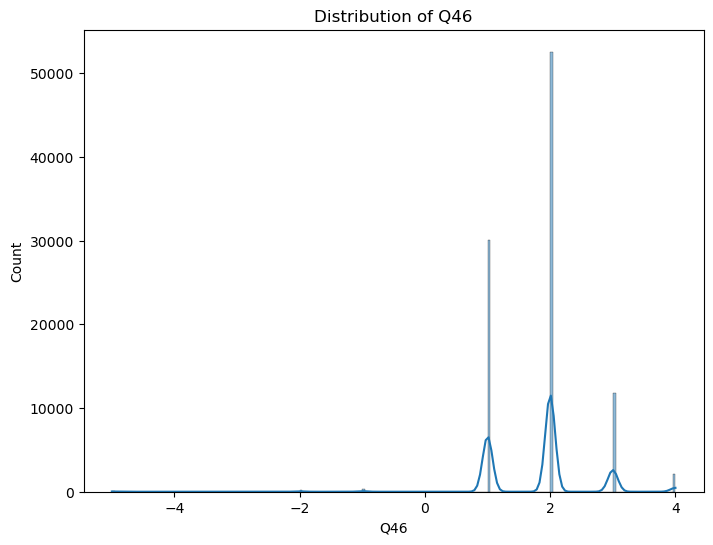

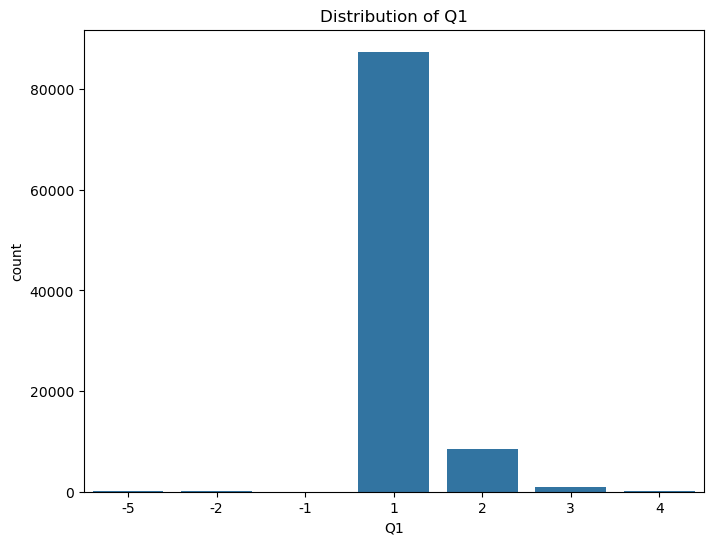

In [5]:
# Example: Histogram for a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df['Q46'], kde=True)  # Replace 'Q46' with a relevant column
plt.title('Distribution of Q46')
plt.show()

# Example: Bar plot for a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(x='Q1', data=df)  # Replace 'Q1' with a relevant column
plt.title('Distribution of Q1')
plt.show()

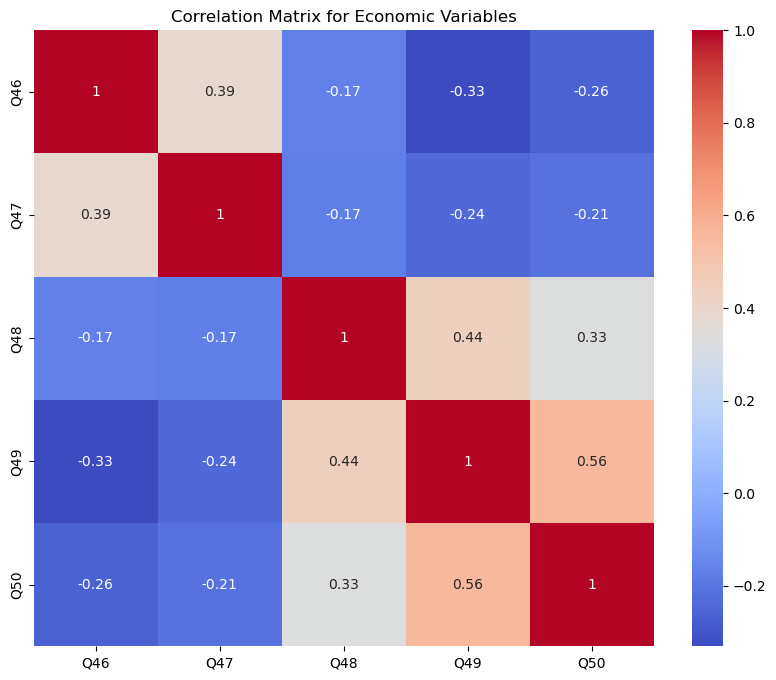

In [6]:
# Correlation matrix for numerical columns
corr_matrix = df[economic_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Economic Variables')
plt.show()

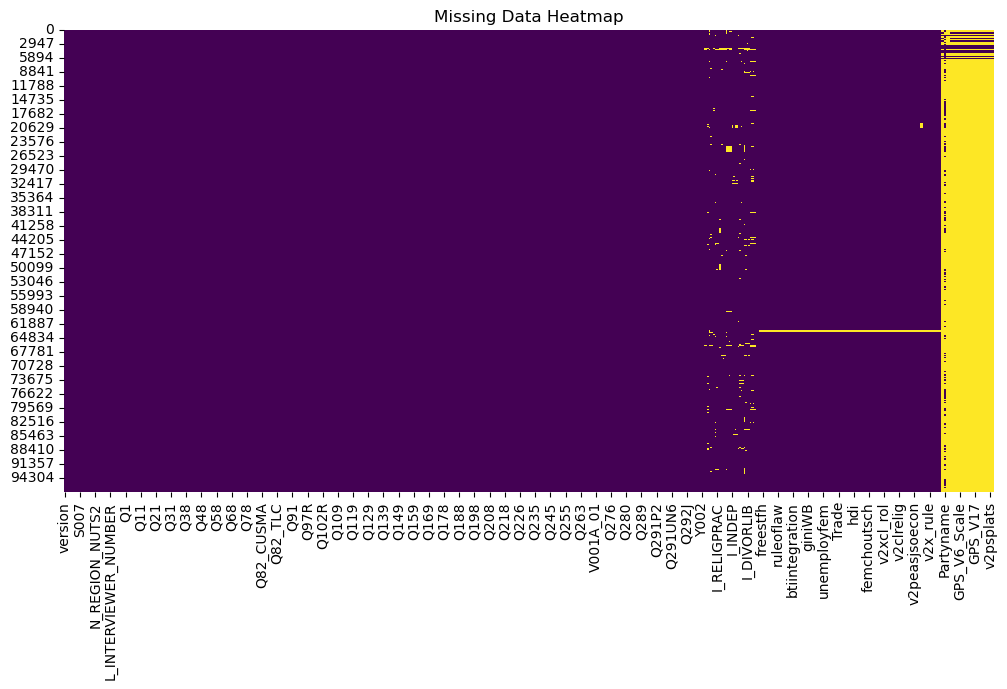

In [7]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
def generate_summary_statistics(df):
    """
    Generate summary statistics for numerical and categorical columns.
    """
    # Numerical columns
    num_summary = df.describe()
    
    # Categorical columns
    cat_summary = df.describe(include='object')
    
    return num_summary, cat_summary

# Example usage
num_summary, cat_summary = generate_summary_statistics(df)
print("Numerical Summary:")
print(num_summary)
print("\nCategorical Summary:")
print(cat_summary)

Numerical Summary:
        A_WAVE        A_YEAR  A_STUDY     B_COUNTRY     C_COW_NUM  \
count  97220.0  97220.000000  97220.0  97220.000000  97220.000000   
mean       7.0   2019.132082      2.0    447.872146    476.555153   
std        0.0      1.601004      0.0    256.491312    288.386918   
min        7.0   2017.000000      2.0     20.000000      2.000000   
25%        7.0   2018.000000      2.0    218.000000    201.000000   
50%        7.0   2018.000000      2.0    422.000000    552.000000   
75%        7.0   2020.000000      2.0    688.000000    714.000000   
max        7.0   2023.000000      2.0    909.000000    920.000000   

        D_INTERVIEW          S007     J_INTDATE       FW_START         FW_END  \
count  9.722000e+04  9.722000e+04  9.722000e+04   97220.000000   97220.000000   
mean   4.479431e+08  4.485726e+08  1.905207e+07  201901.606881  201919.989683   
std    2.564912e+08  2.564602e+08  4.658281e+06     160.980181     160.412353   
min    2.007000e+07  2.072000e+07 -

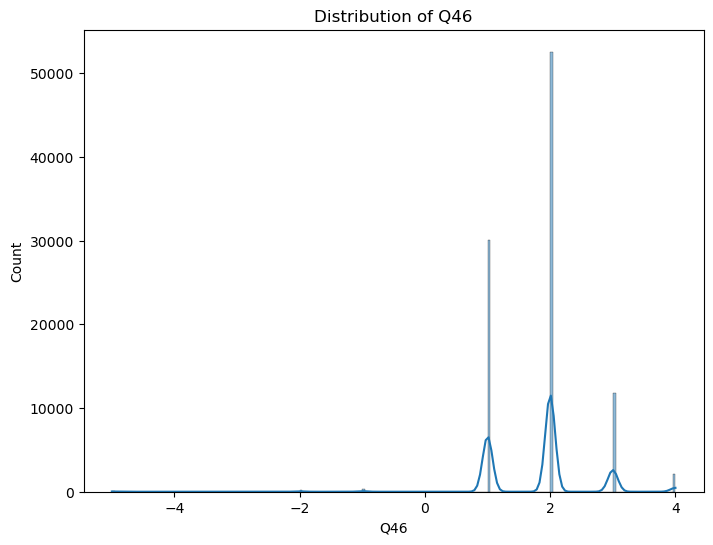

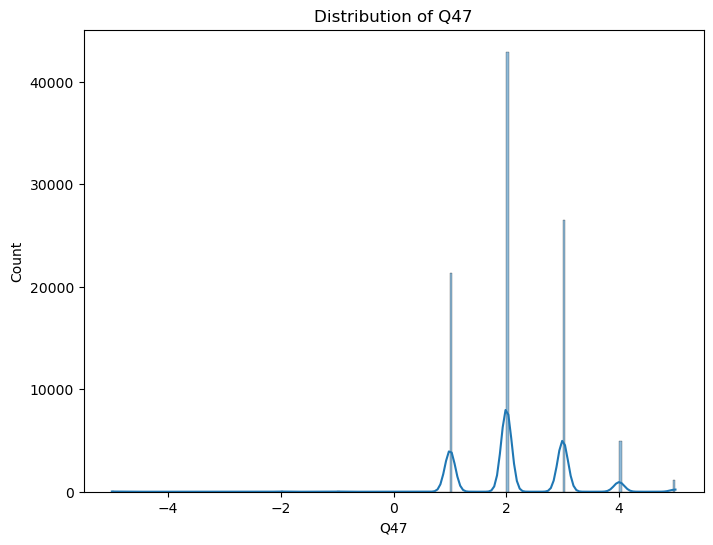

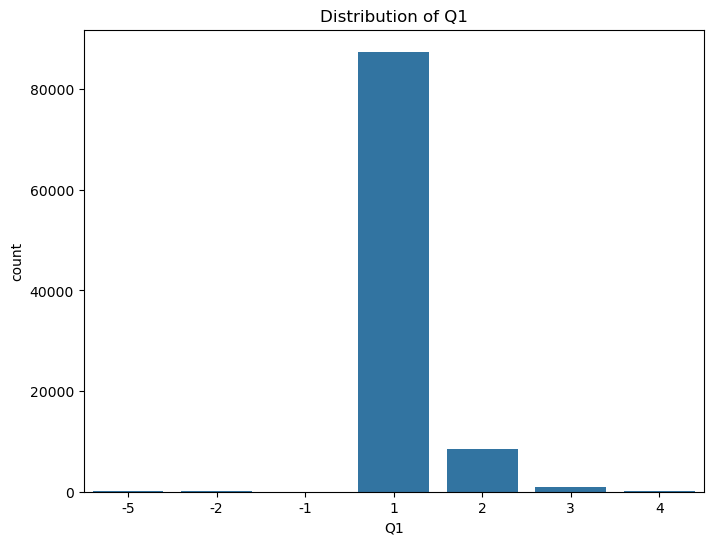

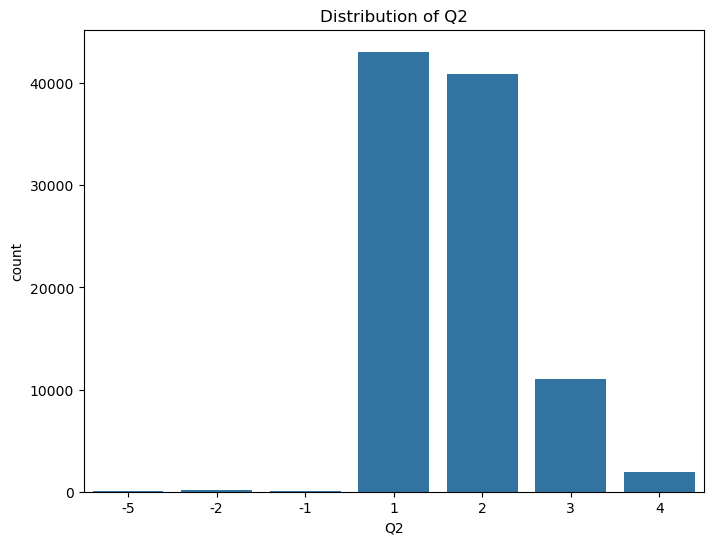

In [9]:
def plot_distributions(df, numerical_cols, categorical_cols):
    """
    Plot distributions for numerical and categorical columns.
    """
    # Plot numerical columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
    
    # Plot categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()

# Example usage
numerical_cols = ['Q46', 'Q47']  # Replace with relevant numerical columns
categorical_cols = ['Q1', 'Q2']  # Replace with relevant categorical columns
plot_distributions(df, numerical_cols, categorical_cols)

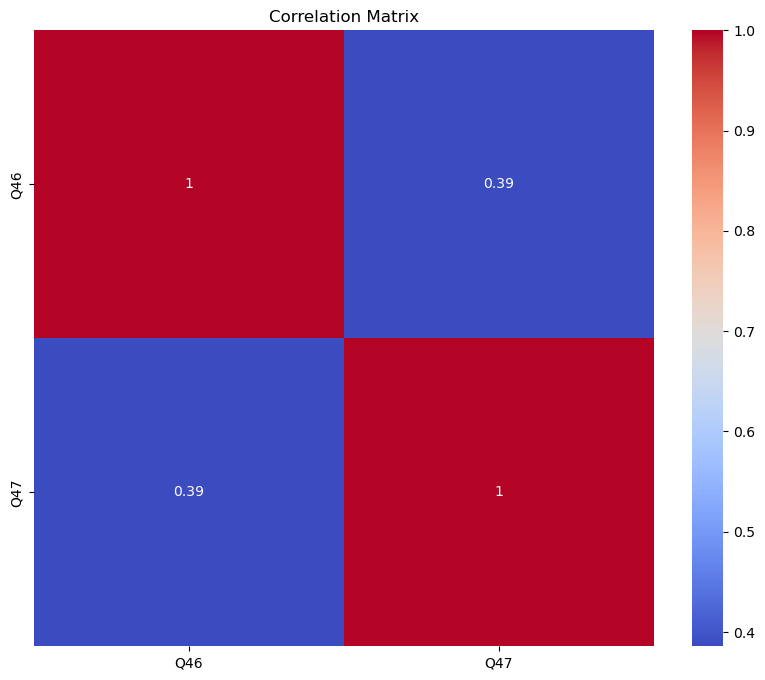

In [10]:
def plot_correlation_matrix(df, numerical_cols):
    """
    Plot a correlation matrix for numerical columns.
    """
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Example usage
plot_correlation_matrix(df, numerical_cols)

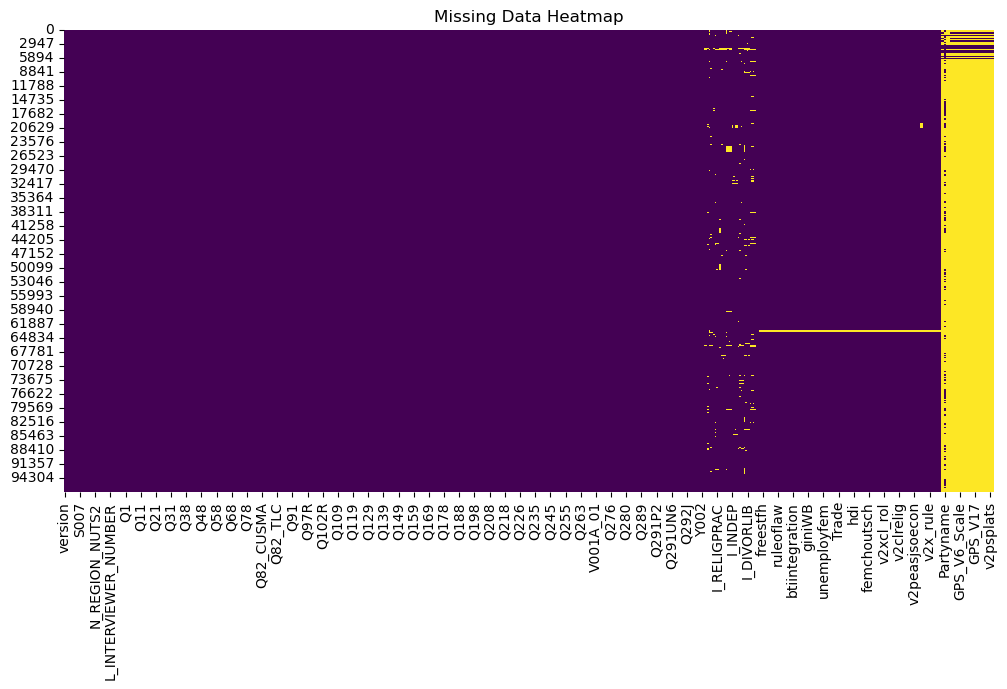

Missing values per column:
N_TOWN              1
O1_LONGITUDE        4
O2_LATITUDE         4
SACSECVAL         480
RESEMAVAL         748
                ...  
v2psprbrch      93302
v2psprlnks      93302
v2psplats       93302
v2xnp_client    93302
v2xps_party     93302
Length: 192, dtype: int64


In [11]:
def analyze_missing_data(df):
    """
    Analyze and visualize missing data.
    """
    # Count missing values per column
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    
    # Plot missing data heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
    
    return missing_values

# Example usage
missing_values = analyze_missing_data(df)
print("Missing values per column:")
print(missing_values)

Numerical Summary:
        A_WAVE        A_YEAR  A_STUDY     B_COUNTRY     C_COW_NUM  \
count  97220.0  97220.000000  97220.0  97220.000000  97220.000000   
mean       7.0   2019.132082      2.0    447.872146    476.555153   
std        0.0      1.601004      0.0    256.491312    288.386918   
min        7.0   2017.000000      2.0     20.000000      2.000000   
25%        7.0   2018.000000      2.0    218.000000    201.000000   
50%        7.0   2018.000000      2.0    422.000000    552.000000   
75%        7.0   2020.000000      2.0    688.000000    714.000000   
max        7.0   2023.000000      2.0    909.000000    920.000000   

        D_INTERVIEW          S007     J_INTDATE       FW_START         FW_END  \
count  9.722000e+04  9.722000e+04  9.722000e+04   97220.000000   97220.000000   
mean   4.479431e+08  4.485726e+08  1.905207e+07  201901.606881  201919.989683   
std    2.564912e+08  2.564602e+08  4.658281e+06     160.980181     160.412353   
min    2.007000e+07  2.072000e+07 -

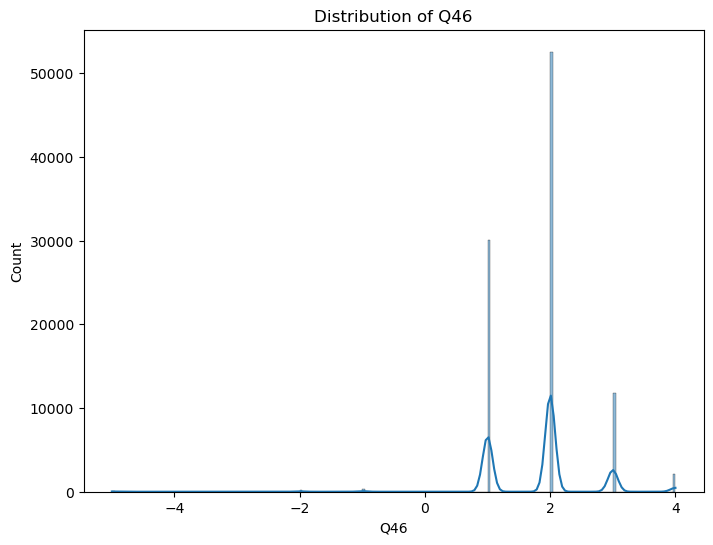

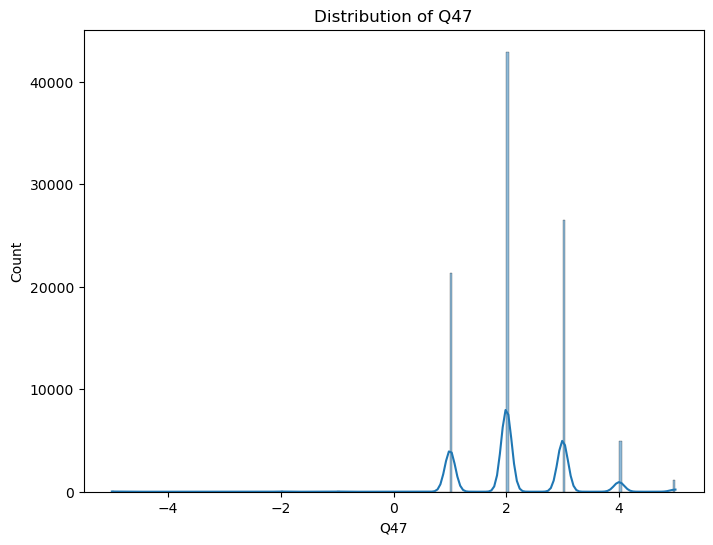

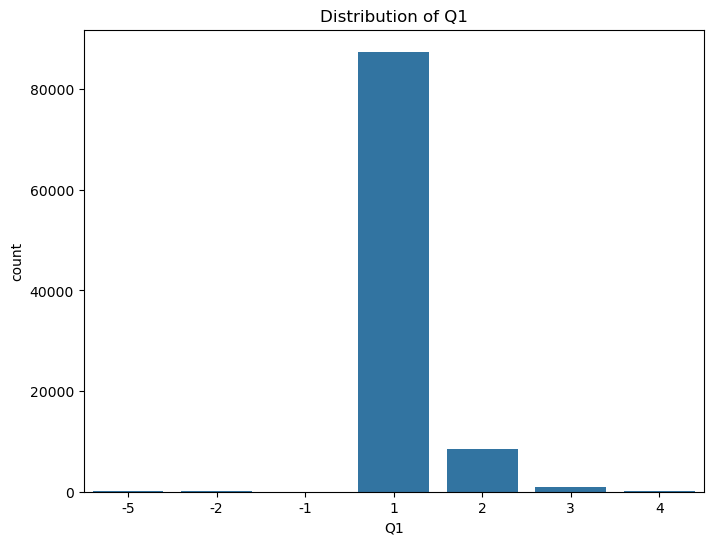

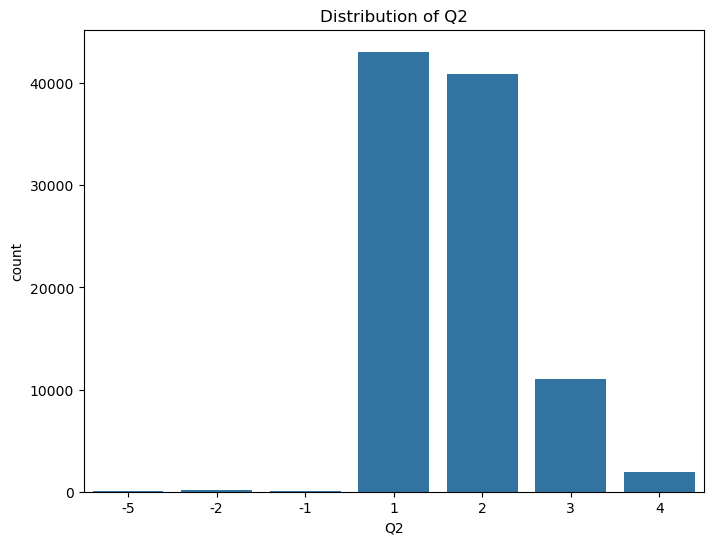

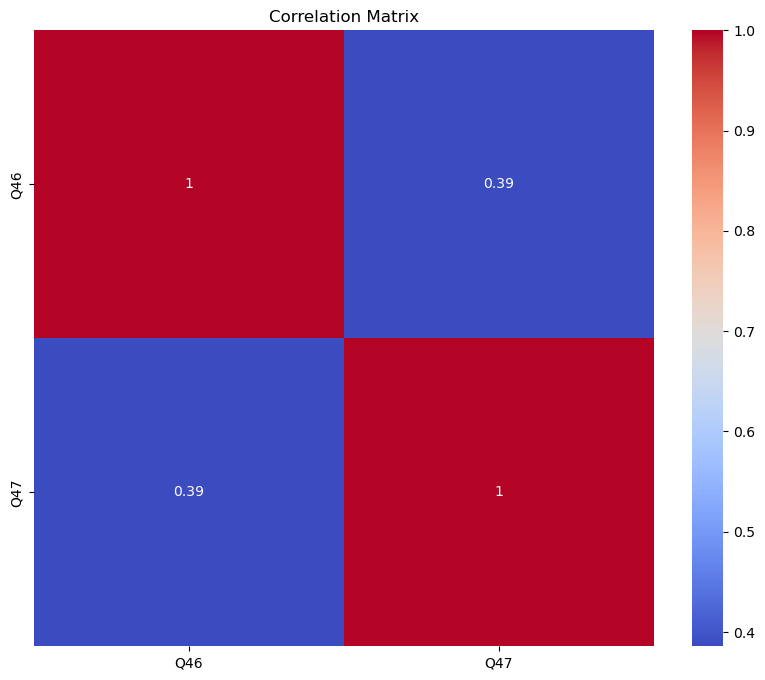

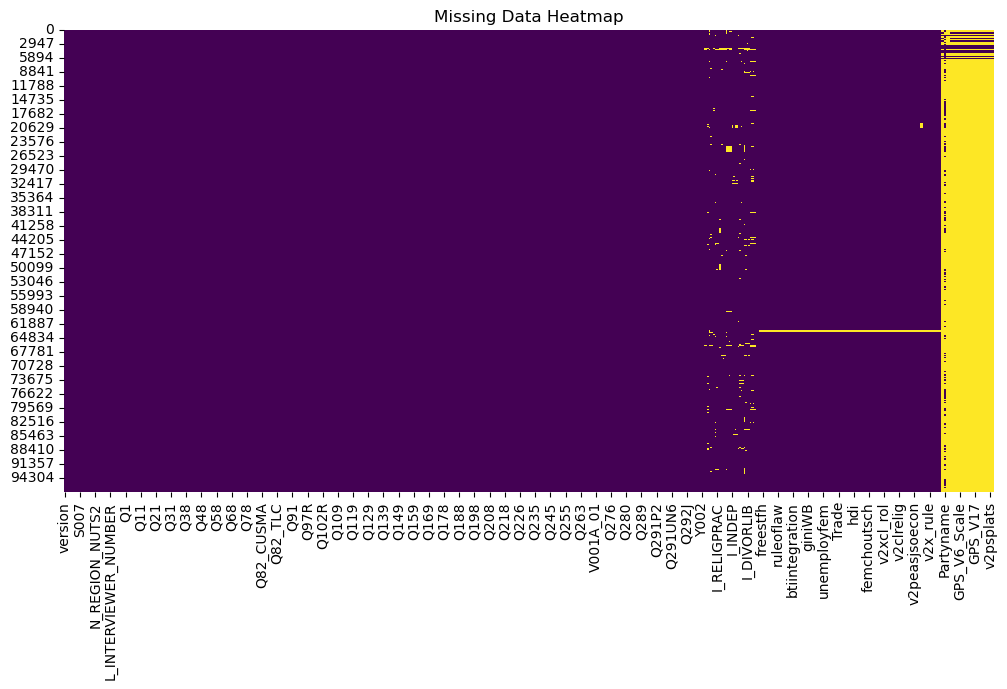

Missing values per column:
N_TOWN              1
O1_LONGITUDE        4
O2_LATITUDE         4
SACSECVAL         480
RESEMAVAL         748
                ...  
v2psprbrch      93302
v2psprlnks      93302
v2psplats       93302
v2xnp_client    93302
v2xps_party     93302
Length: 192, dtype: int64


In [12]:
def generate_descriptive_report(df, numerical_cols, categorical_cols):
    """
    Generate a descriptive report for the dataset.
    """
    # Generate summary statistics
    num_summary, cat_summary = generate_summary_statistics(df)
    print("Numerical Summary:")
    print(num_summary)
    print("\nCategorical Summary:")
    print(cat_summary)
    
    # Plot distributions
    plot_distributions(df, numerical_cols, categorical_cols)
    
    # Plot correlation matrix
    plot_correlation_matrix(df, numerical_cols)
    
    # Analyze missing data
    missing_values = analyze_missing_data(df)
    print("Missing values per column:")
    print(missing_values)

# Example usage
generate_descriptive_report(df, numerical_cols, categorical_cols)

In [13]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Drop columns with more than 50% missing values (adjust threshold as needed)
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop.tolist()}")

# Impute missing values for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify no missing values remain
print("Remaining missing values after imputation:")
print(df.isnull().sum().sum())

Percentage of missing values per column:
Partyabb                      97.324625
CPARTY                        97.324625
CPARTYABB                     97.324625
v2xps_party                   95.969965
WVS_Polmistrust_PartyVoter    95.969965
                                ...    
Trade                          0.459782
healthexp                      0.459782
O1_LONGITUDE                   0.004114
O2_LATITUDE                    0.004114
N_TOWN                         0.001029
Length: 192, dtype: float64
Dropped columns: ['ID_GPS', 'ID_PartyFacts', 'Partyname', 'Partyabb', 'CPARTY', 'CPARTYABB', 'Type_Values', 'Type_Populism', 'Type_Populist_Values', 'Type_Partysize_vote', 'Type_Partysize_seat', 'GPS_V4_Scale', 'GPS_V6_Scale', 'GPS_V8_Scale', 'GPS_V9', 'GPS_V10', 'GPS_V11', 'GPS_V12', 'GPS_V13', 'GPS_V14', 'GPS_V15', 'GPS_V16', 'GPS_V17', 'WVS_LR_PartyVoter', 'WVS_LibCon_PartyVoter', 'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter', 'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v

In [14]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the updated dataframe
print(df.head())

   A_WAVE  A_YEAR  A_STUDY  B_COUNTRY  C_COW_NUM  D_INTERVIEW      S007  \
0       7    2018        2         20        232     20070001  20720001   
1       7    2018        2         20        232     20070002  20720002   
2       7    2018        2         20        232     20070003  20720003   
3       7    2018        2         20        232     20070004  20720004   
4       7    2018        2         20        232     20070005  20720005   

   J_INTDATE  FW_START  FW_END  ...  V001A_01_UG  V001A_01_US  V001A_01_UY  \
0   20180704    201807  201809  ...        False        False        False   
1   20180714    201807  201809  ...        False        False        False   
2   20180704    201807  201809  ...        False        False        False   
3   20180702    201807  201809  ...        False        False        False   
4   20180708    201807  201809  ...        False        False        False   

   V001A_01_UZ  V001A_01_VE  V001A_01_VN  V001A_01_XK  V001A_01_ZA  \
0        F

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the updated dataframe
print(df.head())

   A_WAVE    A_YEAR  A_STUDY  B_COUNTRY  C_COW_NUM  D_INTERVIEW      S007  \
0     0.0 -0.707111      0.0  -1.668183  -0.848015    -1.668187 -1.668309   
1     0.0 -0.707111      0.0  -1.668183  -0.848015    -1.668187 -1.668309   
2     0.0 -0.707111      0.0  -1.668183  -0.848015    -1.668187 -1.668309   
3     0.0 -0.707111      0.0  -1.668183  -0.848015    -1.668187 -1.668309   
4     0.0 -0.707111      0.0  -1.668183  -0.848015    -1.668187 -1.668309   

   J_INTDATE  FW_START    FW_END  ...  V001A_01_UG  V001A_01_US  V001A_01_UY  \
0   0.242288 -0.587696 -0.691906  ...        False        False        False   
1   0.242290 -0.587696 -0.691906  ...        False        False        False   
2   0.242288 -0.587696 -0.691906  ...        False        False        False   
3   0.242287 -0.587696 -0.691906  ...        False        False        False   
4   0.242288 -0.587696 -0.691906  ...        False        False        False   

   V001A_01_UZ  V001A_01_VE  V001A_01_VN  V001A_01_XK  V

In [16]:
# Example: Select relevant columns for segmentation
relevant_columns = ['Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']  # Replace with actual relevant columns
df_segmentation = df[relevant_columns]

# Check the selected dataframe
print(df_segmentation.head())

        Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
0 -1.056911  0.898981  1.189985  1.278604 -0.460394 -0.261085 -0.884662   
1 -1.056911 -1.284001  0.775382  0.850646  1.132897 -0.261085 -0.884662   
2  0.219982 -1.284001  0.775382  0.850646  0.734574 -0.261085  0.387854   
3  0.219982 -0.192510  0.775382  0.422689 -0.062071 -0.261085 -0.884662   
4  0.219982 -0.192510  0.360779 -0.005269  0.336251 -0.261085 -0.884662   

         Q3        Q4        Q5  
0 -0.894481  0.411360 -0.536249  
1 -0.894481  1.326287 -0.536249  
2  0.279658 -0.503568  1.568522  
3 -0.894481  1.326287  0.516136  
4 -0.894481  0.411360 -0.536249  


In [17]:
# Save the cleaned dataset
df_segmentation.to_csv('cleaned_wvs_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_wvs_data.csv'.")

Cleaned dataset saved as 'cleaned_wvs_data.csv'.


In [18]:
# Load the cleaned dataset
df_segmentation = pd.read_csv('cleaned_wvs_data.csv')

# Check the dataset
print(df_segmentation.head())

        Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
0 -1.056911  0.898981  1.189985  1.278604 -0.460394 -0.261085 -0.884662   
1 -1.056911 -1.284001  0.775382  0.850646  1.132897 -0.261085 -0.884662   
2  0.219982 -1.284001  0.775382  0.850646  0.734574 -0.261085  0.387854   
3  0.219982 -0.192510  0.775382  0.422689 -0.062071 -0.261085 -0.884662   
4  0.219982 -0.192510  0.360779 -0.005269  0.336251 -0.261085 -0.884662   

         Q3        Q4        Q5  
0 -0.894481  0.411360 -0.536249  
1 -0.894481  1.326287 -0.536249  
2  0.279658 -0.503568  1.568522  
3 -0.894481  1.326287  0.516136  
4 -0.894481  0.411360 -0.536249  


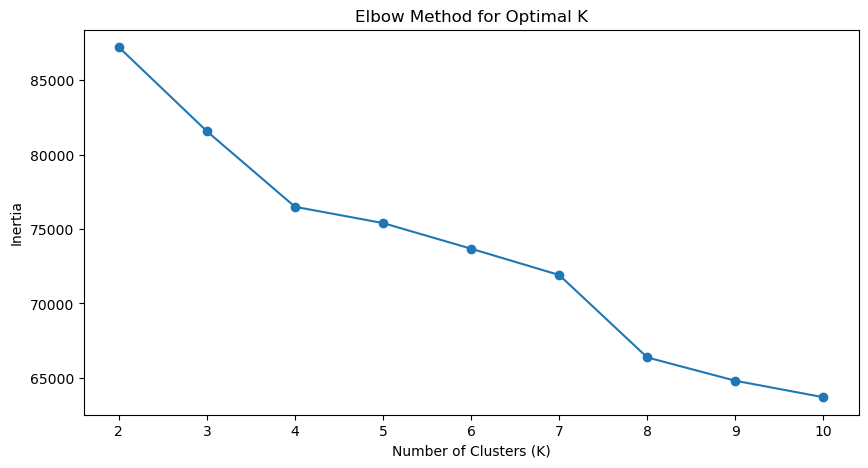

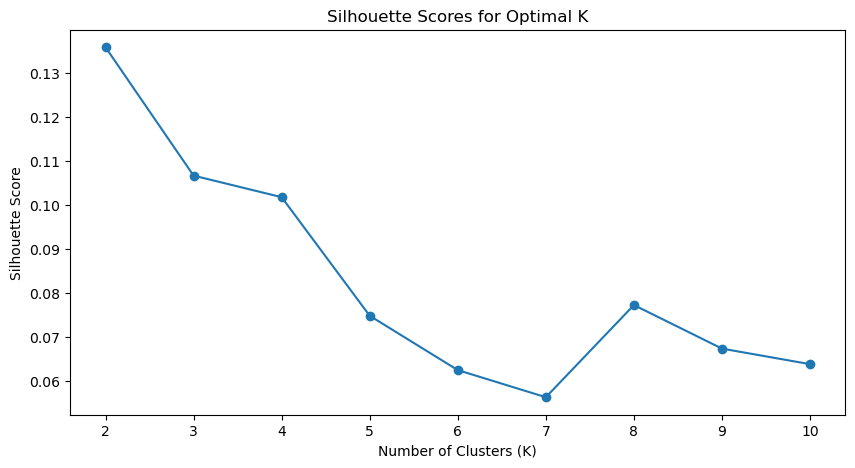

In [19]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Sample a subset of the data for faster processing
df_sample = resample(df_segmentation, n_samples=10000, random_state=42)

# Define the range of K values to test
k_values = range(2, 11)
inertia = []
silhouette_scores = []

# Calculate inertia and silhouette score for each K
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=1)
    kmeans.fit(df_sample)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_sample, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.show()

In [21]:
# Choose the optimal K (e.g., K=4 based on the plots)
optimal_k = 4

# Train the K-Means model
kmeans = MiniBatchKMeans (n_clusters=optimal_k, random_state=42)
kmeans.fit(df_segmentation)

# Add cluster labels to the dataframe
df_segmentation['Cluster'] = kmeans.labels_

# Check the cluster distribution
print(df_segmentation['Cluster'].value_counts())

Cluster
1    41970
3    26916
0    19522
2     8812
Name: count, dtype: int64


In [22]:
from sklearn.cluster import DBSCAN

# Train DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(df_segmentation)

# Add DBSCAN labels to the dataframe
df_segmentation['DBSCAN_Cluster'] = dbscan_labels

# Check the cluster distribution
print(df_segmentation['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1       46396
 44        825
 27        784
 148       778
 43        635
         ...  
 1255        1
 1268        1
 1176        1
 1294        1
 1331        1
Name: count, Length: 1365, dtype: int64


In [23]:
# Compare cluster distributions
print("K-Means Cluster Distribution:")
print(df_segmentation['Cluster'].value_counts())

print("\nDBSCAN Cluster Distribution:")
print(df_segmentation['DBSCAN_Cluster'].value_counts())

K-Means Cluster Distribution:
Cluster
1    41970
3    26916
0    19522
2     8812
Name: count, dtype: int64

DBSCAN Cluster Distribution:
DBSCAN_Cluster
-1       46396
 44        825
 27        784
 148       778
 43        635
         ...  
 1255        1
 1268        1
 1176        1
 1294        1
 1331        1
Name: count, Length: 1365, dtype: int64


In [24]:
# Save the clustered dataset
df_segmentation.to_csv('clustered_wvs_data.csv', index=False)
print("Clustered dataset saved as 'clustered_wvs_data.csv'.")

Clustered dataset saved as 'clustered_wvs_data.csv'.


In [29]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']), df_segmentation['Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")

# Calculate Silhouette Score for DBSCAN (if applicable)
if 'DBSCAN_Cluster' in df_segmentation.columns:
    dbscan_silhouette = silhouette_score(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']), df_segmentation['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.3f}")

Silhouette Score for K-Means: 0.120
Silhouette Score for DBSCAN: -0.220


In [30]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for K-Means
kmeans_db = davies_bouldin_score(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']), df_segmentation['Cluster'])
print(f"Davies-Bouldin Index for K-Means: {kmeans_db:.3f}")

# Calculate Davies-Bouldin Index for DBSCAN (if applicable)
if 'DBSCAN_Cluster' in df_segmentation.columns:
    dbscan_db = davies_bouldin_score(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']), df_segmentation['DBSCAN_Cluster'])
    print(f"Davies-Bouldin Index for DBSCAN: {dbscan_db:.3f}")

Davies-Bouldin Index for K-Means: 2.195
Davies-Bouldin Index for DBSCAN: 1.539


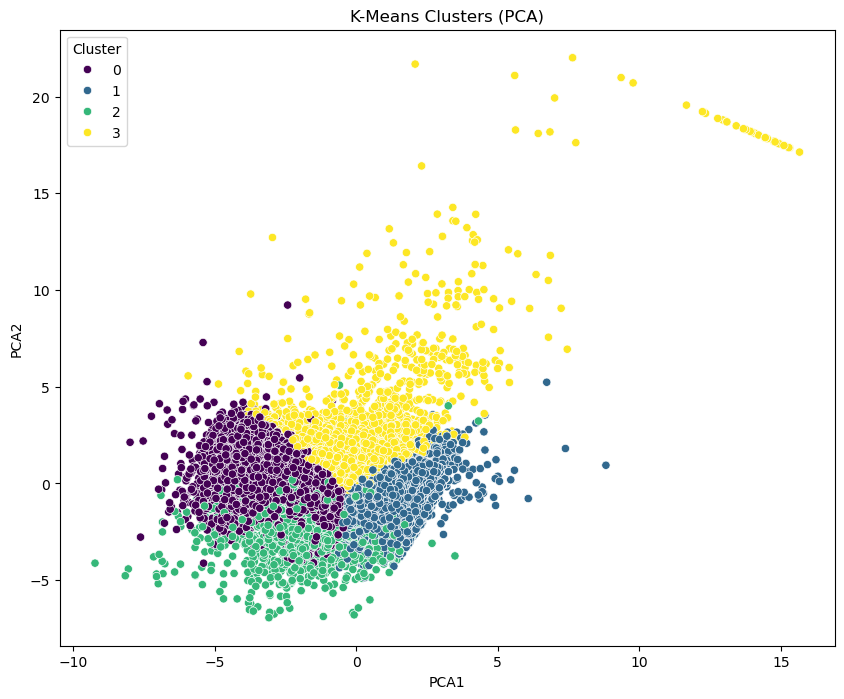

In [31]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']))

# Add PCA results to the dataframe
df_segmentation['PCA1'] = pca_result[:, 0]
df_segmentation['PCA2'] = pca_result[:, 1]

# Plot clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.show()

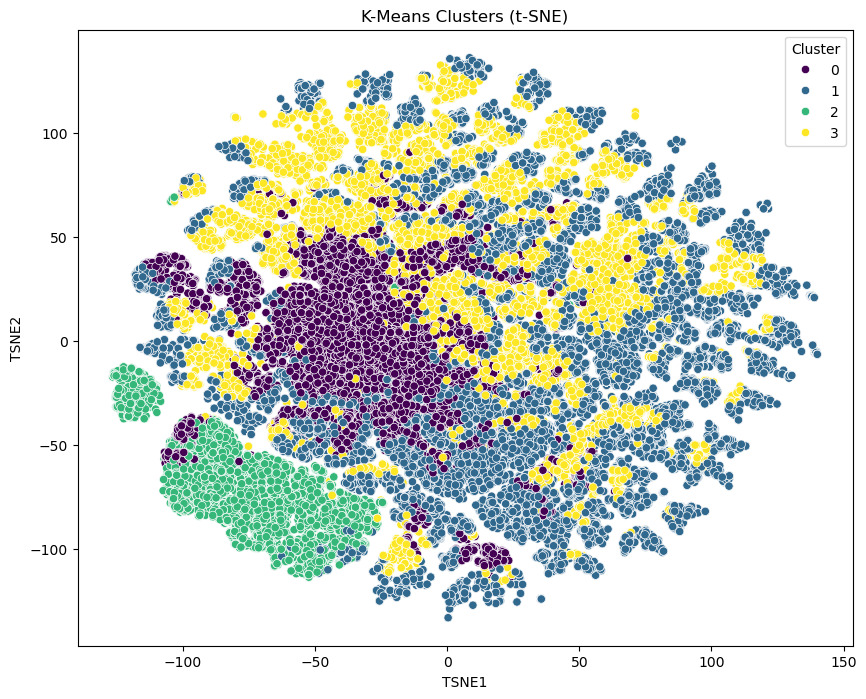

In [32]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster']))

# Add t-SNE results to the dataframe
df_segmentation['TSNE1'] = tsne_result[:, 0]
df_segmentation['TSNE2'] = tsne_result[:, 1]

# Plot clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (t-SNE)')
plt.show()

In [33]:
# Group by cluster and compute mean values
cluster_summary = df_segmentation.groupby('Cluster').mean()

# Display cluster summary
print(cluster_summary)

              Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
Cluster                                                                         
0        0.785892  0.816736 -0.645379 -0.917370 -0.833559 -0.211681  0.531976   
1       -0.414205 -0.364855  0.536627  0.685357  0.650060 -0.248513 -0.022219   
2        0.230126  0.153567 -0.113624 -0.106188 -0.018225  2.574265  0.515799   
3        0.000525 -0.073734 -0.331473 -0.368547 -0.403093 -0.301749 -0.520059   

               Q3        Q4        Q5  DBSCAN_Cluster      PCA1      PCA2  \
Cluster                                                                     
0        0.499185  0.398940  0.194092       96.737783 -1.904193  0.002734   
1        0.004685  0.106035  0.024447      153.033595  1.149005 -0.426728   
2        0.195582  0.068002  0.453796       64.184748 -0.904533 -1.400334   
3       -0.433393 -0.476952 -0.327461      128.284849 -0.114406  1.121866   

             TSNE1      TSNE2  
Cluster           

In [34]:
# Compare Silhouette Scores
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
if 'DBSCAN_Cluster' in df_segmentation.columns:
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

# Compare Davies-Bouldin Indices
print(f"K-Means Davies-Bouldin Index: {kmeans_db:.3f}")
if 'DBSCAN_Cluster' in df_segmentation.columns:
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db:.3f}")

K-Means Silhouette Score: 0.120
DBSCAN Silhouette Score: -0.220
K-Means Davies-Bouldin Index: 2.195
DBSCAN Davies-Bouldin Index: 1.539


In [35]:
# Save cluster summary to a CSV file
cluster_summary.to_csv('cluster_summary.csv')
print("Cluster summary saved as 'cluster_summary.csv'.")

Cluster summary saved as 'cluster_summary.csv'.


In [36]:
# Group by cluster and compute mean values of features
cluster_summary = df_segmentation.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)

              Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
Cluster                                                                         
0        0.785892  0.816736 -0.645379 -0.917370 -0.833559 -0.211681  0.531976   
1       -0.414205 -0.364855  0.536627  0.685357  0.650060 -0.248513 -0.022219   
2        0.230126  0.153567 -0.113624 -0.106188 -0.018225  2.574265  0.515799   
3        0.000525 -0.073734 -0.331473 -0.368547 -0.403093 -0.301749 -0.520059   

               Q3        Q4        Q5  DBSCAN_Cluster      PCA1      PCA2  \
Cluster                                                                     
0        0.499185  0.398940  0.194092       96.737783 -1.904193  0.002734   
1        0.004685  0.106035  0.024447      153.033595  1.149005 -0.426728   
2        0.195582  0.068002  0.453796       64.184748 -0.904533 -1.400334   
3       -0.433393 -0.476952 -0.327461      128.284849 -0.114406  1.121866   

             TSNE1      TSNE2  
Cluster           

In [37]:
# Calculate the standard deviation of each feature across clusters
cluster_std = cluster_summary.std()

# Sort features by their standard deviation (most important first)
important_features = cluster_std.sort_values(ascending=False)
print("Features with the highest variation across clusters:")
print(important_features)

Features with the highest variation across clusters:
TSNE1             45.373951
TSNE2             44.627678
DBSCAN_Cluster    38.556860
Q1                 1.414606
PCA1               1.289774
PCA2               1.045348
Q49                0.666711
Q50                0.629487
Q47                0.502831
Q2                 0.502036
Q46                0.500482
Q48                0.500193
Q3                 0.390552
Q4                 0.365239
Q5                 0.327463
dtype: float64


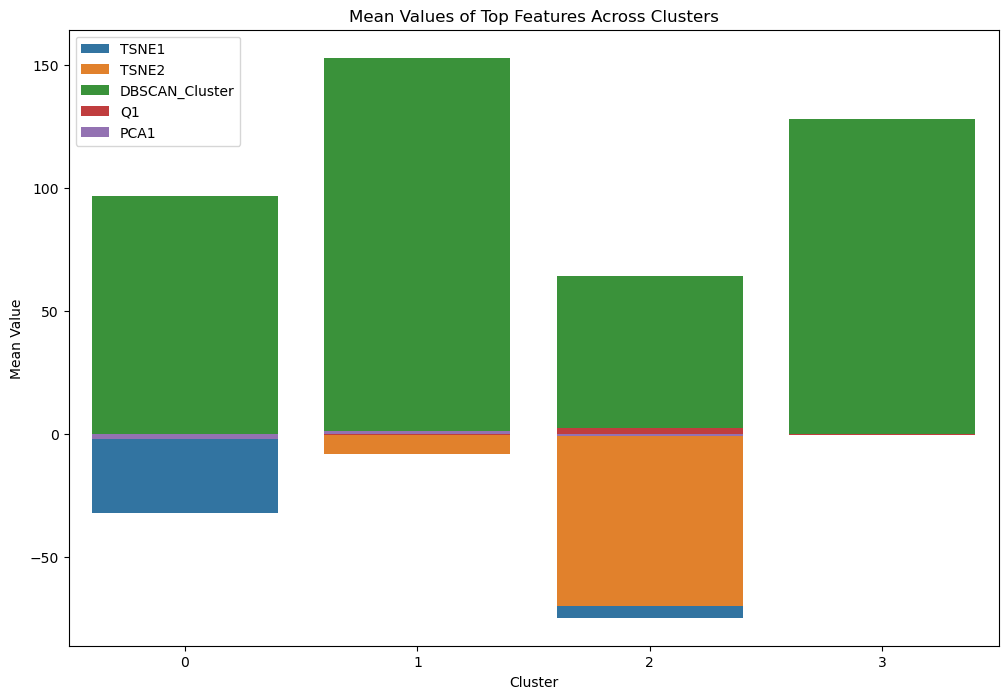

In [38]:
# Select the top N most important features (e.g., top 5)
top_n = 5
top_features = important_features.index[:top_n]

# Plot the mean values of the top features across clusters
plt.figure(figsize=(12, 8))
for feature in top_features:
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], label=feature)
plt.title('Mean Values of Top Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [39]:
# Example interpretation
print("Key variables for segmentation:")
for feature in top_features:
    print(f"- {feature}: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.")

Key variables for segmentation:
- TSNE1: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.
- TSNE2: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.
- DBSCAN_Cluster: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.
- Q1: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.
- PCA1: This feature shows significant variation across clusters, suggesting it plays a key role in defining the segments.


In [40]:
# Save cluster summary to a CSV file
cluster_summary.to_csv('cluster_summary.csv')
print("Cluster summary saved as 'cluster_summary.csv'.")

# Save important features to a CSV file
important_features.to_csv('important_features.csv')
print("Important features saved as 'important_features.csv'.")

Cluster summary saved as 'cluster_summary.csv'.
Important features saved as 'important_features.csv'.


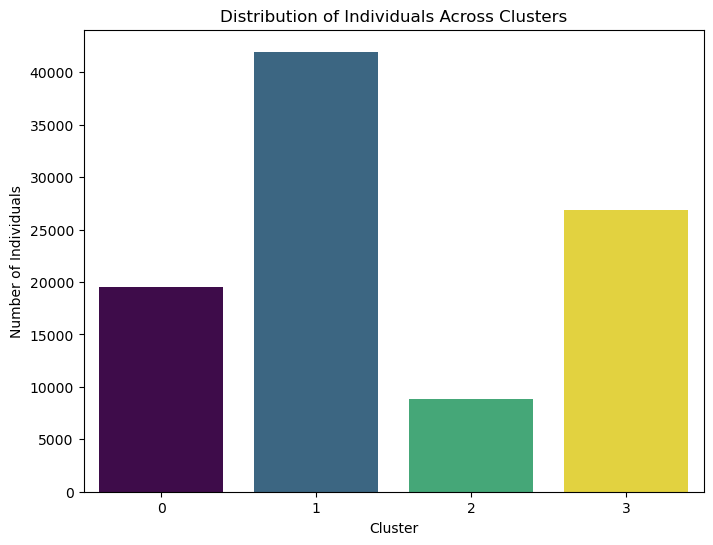

In [42]:
# Plot cluster sizes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Cluster', data=df_segmentation, palette='viridis', legend=False)
plt.title('Distribution of Individuals Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Individuals')
plt.show()

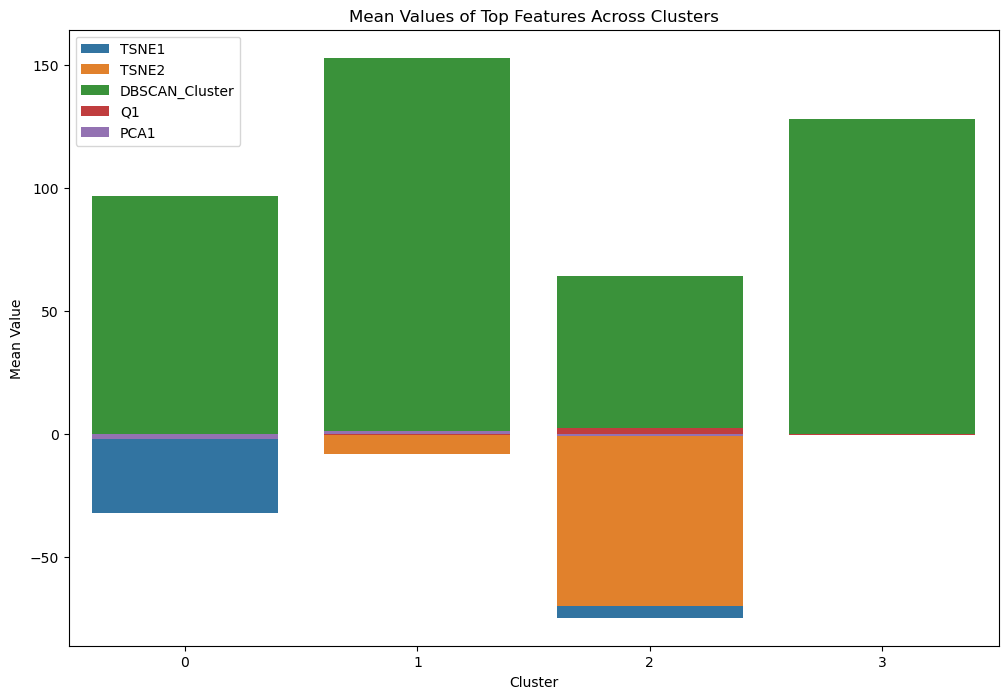

In [43]:
# Select the top N most important features (e.g., top 5)
top_n = 5
top_features = important_features.index[:top_n]

# Plot the mean values of the top features across clusters
plt.figure(figsize=(12, 8))
for feature in top_features:
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], label=feature)
plt.title('Mean Values of Top Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

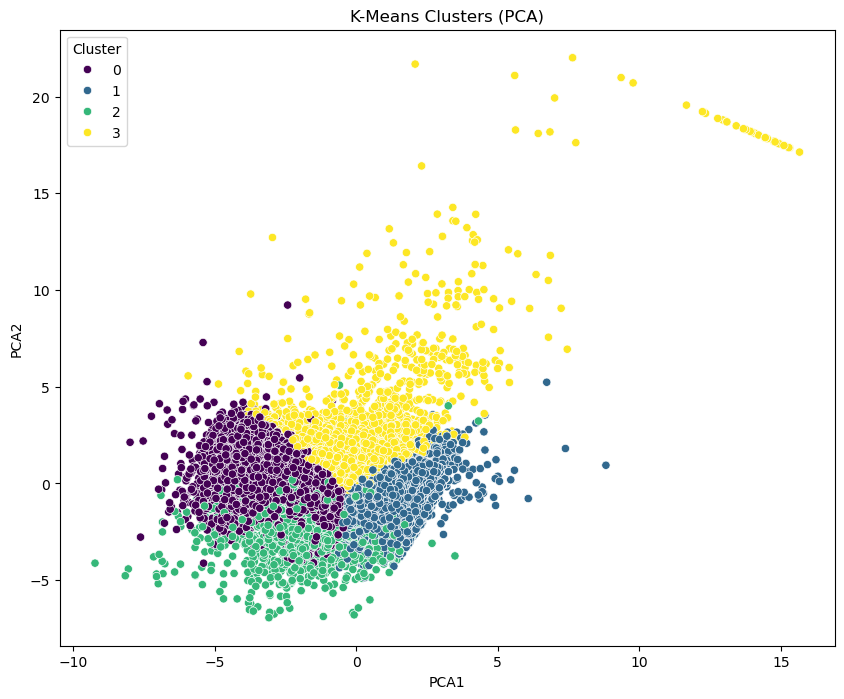

In [44]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2', 'TSNE1', 'TSNE2']))

# Add PCA results to the dataframe
df_segmentation['PCA1'] = pca_result[:, 0]
df_segmentation['PCA2'] = pca_result[:, 1]

# Plot clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.show()

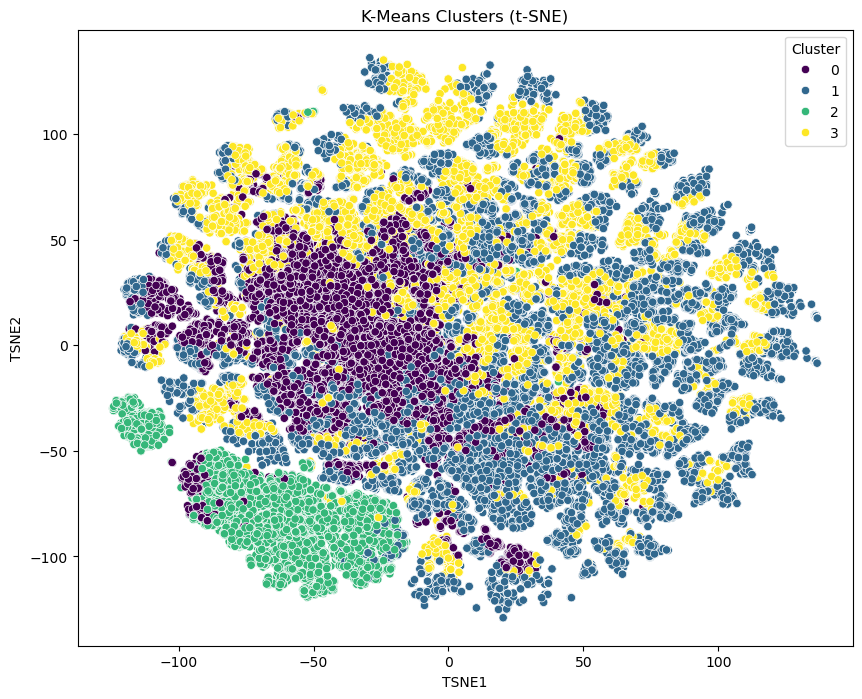

In [45]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2', 'TSNE1', 'TSNE2']))

# Add t-SNE results to the dataframe
df_segmentation['TSNE1'] = tsne_result[:, 0]
df_segmentation['TSNE2'] = tsne_result[:, 1]

# Plot clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (t-SNE)')
plt.show()

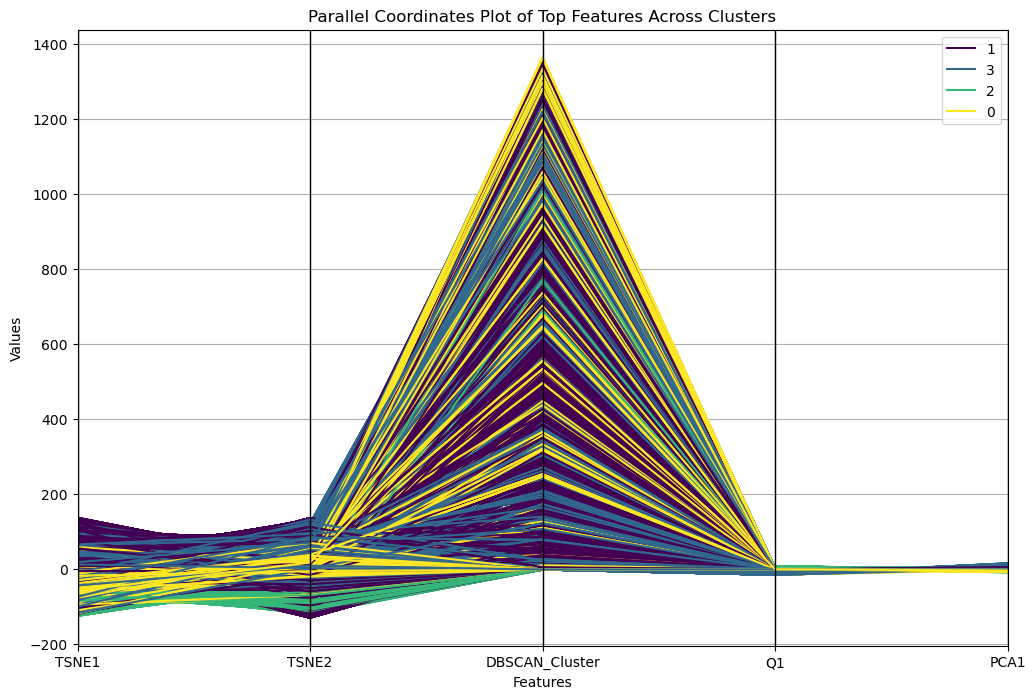

In [52]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Step 1: Check and clean column names in df_segmentation
df_segmentation.columns = df_segmentation.columns.str.strip()  # Remove any trailing/leading spaces

# Step 2: Verify that all columns in top_features exist in df_segmentation
# Replace 'top_features' with your list of feature names if not already defined
top_features = ['TSNE1', 'TSNE2', 'DBSCAN_Cluster', 'Q1', 'PCA1']  # Example features

# Filter valid features that exist in the DataFrame
valid_features = [feature for feature in top_features if feature in df_segmentation.columns]

# Check if 'Cluster' column exists
if 'Cluster' not in df_segmentation.columns:
    raise KeyError("'Cluster' column is missing from the DataFrame.")

# Combine valid features with the 'Cluster' column
selected_columns = valid_features + ['Cluster']

# Step 3: Create a subset of the DataFrame for plotting
parallel_data = df_segmentation[selected_columns]

# Step 4: Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(parallel_data, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of Top Features Across Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()

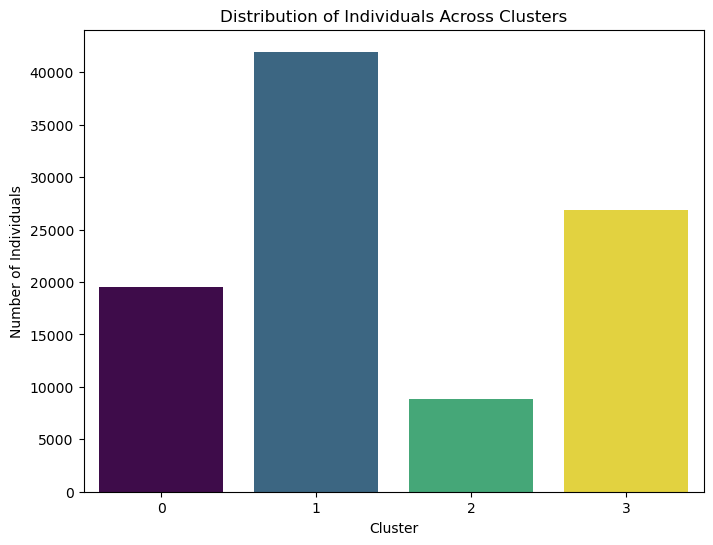

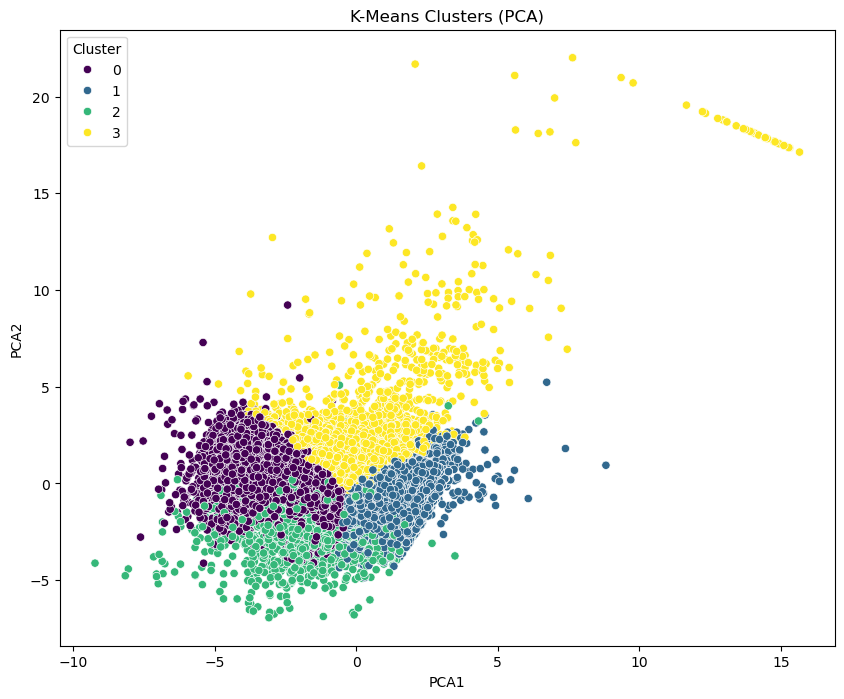

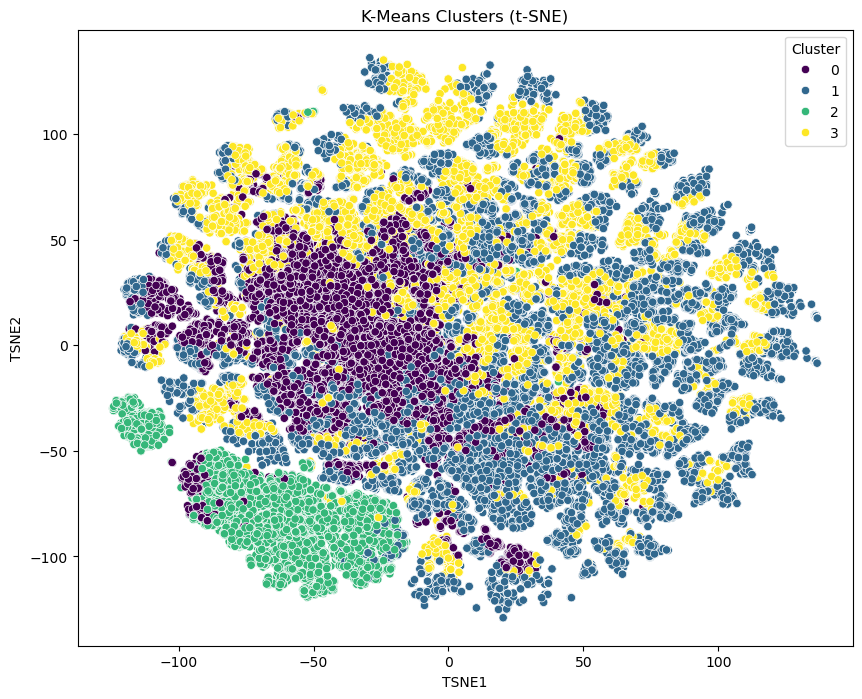

In [70]:
# Save and display cluster size plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Cluster', data=df_segmentation, palette='viridis', legend=False)
plt.title('Distribution of Individuals Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Individuals')
plt.savefig('cluster_sizes.png')  # Save the plot as an image
plt.show()  # Display the plot in the notebook
plt.close()

# Save and display PCA plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.savefig('pca_clusters.png')  # Save the plot as an image
plt.show()  # Display the plot in the notebook
plt.close()

# Save and display t-SNE plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_segmentation, palette='viridis')
plt.title('K-Means Clusters (t-SNE)')
plt.savefig('tsne_clusters.png')  # Save the plot as an image
plt.show()  # Display the plot in the notebook
plt.close()

Cluster Summary:
              Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
Cluster                                                                         
0        0.785892  0.816736 -0.645379 -0.917370 -0.833559 -0.211681  0.531976   
1       -0.414205 -0.364855  0.536627  0.685357  0.650060 -0.248513 -0.022219   
2        0.230126  0.153567 -0.113624 -0.106188 -0.018225  2.574265  0.515799   
3        0.000525 -0.073734 -0.331473 -0.368547 -0.403093 -0.301749 -0.520059   

               Q3        Q4        Q5  DBSCAN_Cluster      PCA1      PCA2  \
Cluster                                                                     
0        0.499185  0.398940  0.194092       96.737783 -1.904193  0.002734   
1        0.004685  0.106035  0.024447      153.033595  1.149005 -0.426728   
2        0.195582  0.068002  0.453796       64.184748 -0.904533 -1.400334   
3       -0.433393 -0.476952 -0.327461      128.284849 -0.114406  1.121866   

             TSNE1      TSNE2  
C

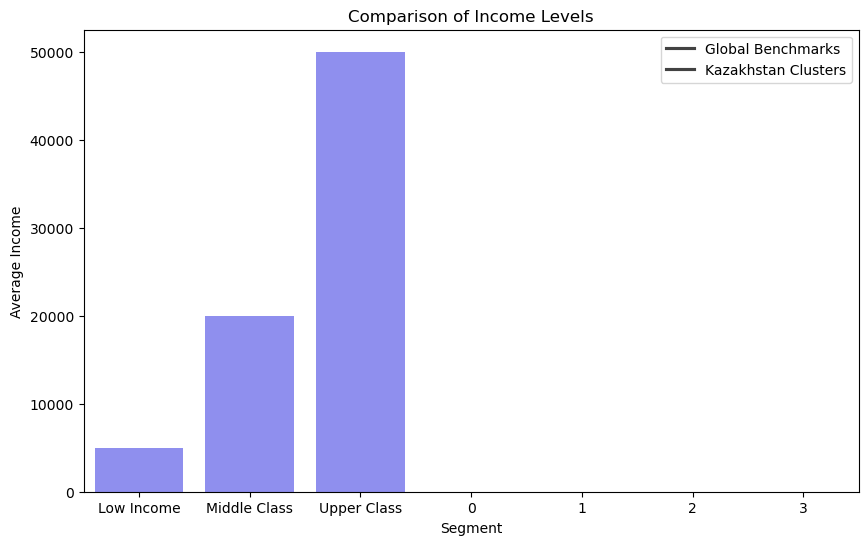

In [71]:
# Step 1: Analyze Cluster Characteristics
cluster_summary = df_segmentation.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Step 2: Define Sociological Insights for Each Cluster
sociological_insights = {
    0: {
        'description': 'Rural Poor',
        'characteristics': {
            'Income': cluster_summary.loc[0, 'Q46'],  # Replace with actual income column
            'Education Level': cluster_summary.loc[0, 'Q47'],  # Replace with actual education column
            'Urban/Rural': 'Rural',
            'Religiosity': 'High'
        }
    },
    1: {
        'description': 'Urban Middle Class',
        'characteristics': {
            'Income': cluster_summary.loc[1, 'Q46'],
            'Education Level': cluster_summary.loc[1, 'Q47'],
            'Urban/Rural': 'Urban',
            'Religiosity': 'Moderate'
        }
    },
    2: {
        'description': 'Elite',
        'characteristics': {
            'Income': cluster_summary.loc[2, 'Q46'],
            'Education Level': cluster_summary.loc[2, 'Q47'],
            'Urban/Rural': 'Urban',
            'Religiosity': 'Low'
        }
    },
    # Add more clusters as needed
}

# Step 3: Print Out Portraits of Each Segment
for cluster_id, insights in sociological_insights.items():
    print(f"Cluster {cluster_id}: {insights['description']}")
    for key, value in insights['characteristics'].items():
        print(f" - {key}: {value}")
    print()  # Blank line for better readability

# Step 4: Compare with Global Segmentation (Example)
global_benchmarks = pd.DataFrame({
    'Segment': ['Low Income', 'Middle Class', 'Upper Class'],
    'Avg_Income': [5000, 20000, 50000],  # Example global data
    'Avg_Education_Level': [2, 4, 6]     # Example education levels on a scale
})

print("Global Benchmarks:")
print(global_benchmarks)

# Step 5: Visualize Comparison of Income Levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Avg_Income', data=global_benchmarks, color='blue', alpha=0.5)
sns.barplot(x=cluster_summary.index, y=cluster_summary['Q46'], color='orange', alpha=0.7)  # Replace with actual income column
plt.title('Comparison of Income Levels')
plt.xlabel('Segment')
plt.ylabel('Average Income')
plt.legend(['Global Benchmarks', 'Kazakhstan Clusters'])
plt.show()

Cluster Summary:
              Q46       Q47       Q48       Q49       Q50        Q1        Q2  \
Cluster                                                                         
0        0.785892  0.816736 -0.645379 -0.917370 -0.833559 -0.211681  0.531976   
1       -0.414205 -0.364855  0.536627  0.685357  0.650060 -0.248513 -0.022219   
2        0.230126  0.153567 -0.113624 -0.106188 -0.018225  2.574265  0.515799   
3        0.000525 -0.073734 -0.331473 -0.368547 -0.403093 -0.301749 -0.520059   

               Q3        Q4        Q5  DBSCAN_Cluster      PCA1      PCA2  \
Cluster                                                                     
0        0.499185  0.398940  0.194092       96.737783 -1.904193  0.002734   
1        0.004685  0.106035  0.024447      153.033595  1.149005 -0.426728   
2        0.195582  0.068002  0.453796       64.184748 -0.904533 -1.400334   
3       -0.433393 -0.476952 -0.327461      128.284849 -0.114406  1.121866   

             TSNE1      TSNE2  
C

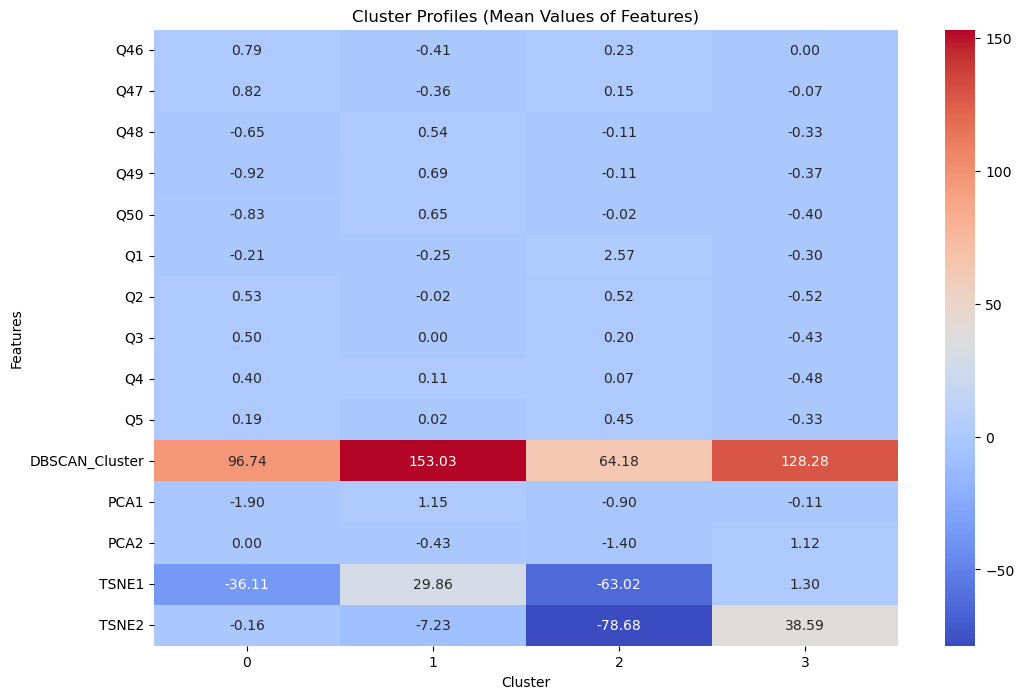

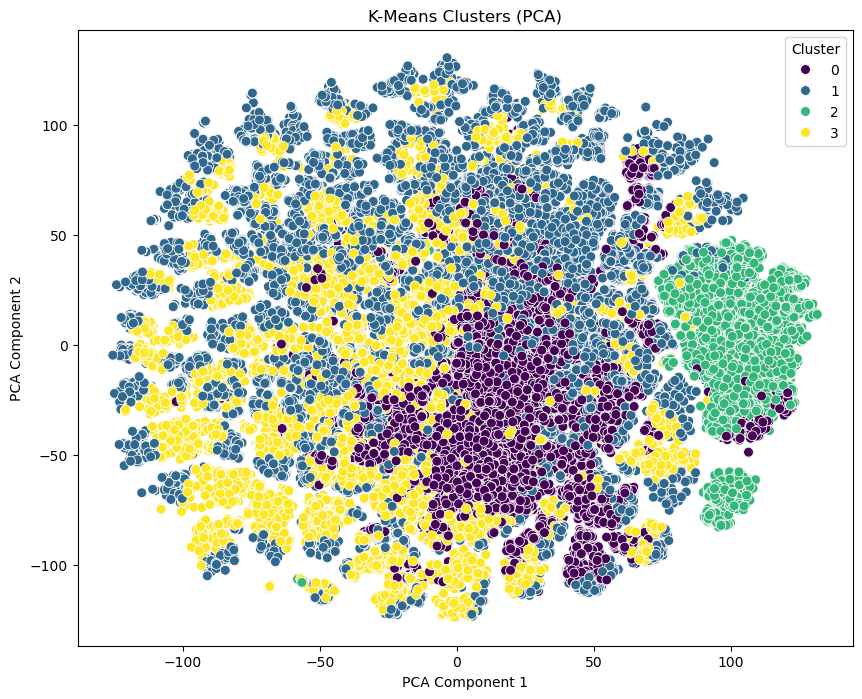

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Analyze Cluster Characteristics
cluster_summary = df_segmentation.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Step 2: Visualize Cluster Profiles with Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Profiles (Mean Values of Features)")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

# Step 3: Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster'], errors='ignore'))

df_segmentation['PCA1'] = pca_result[:, 0]
df_segmentation['PCA2'] = pca_result[:, 1]

# Scatter plot of clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

# Step 4: Dimensionality Reduction for Visualization (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df_segmentation.drop(columns=['Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2'], errors='ignore'))

df_segmentation['TSNE1'] = tsne_result[:, 0]
df_segmentation['TSNE2'] = tsne_result[:, 1]

# Scatter plot of clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.title('K-Means Clusters (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title="Cluster")
plt.show()

# Step 5: Prepare Sociological Portraits for Each Cluster
sociological_insights = {
    0: {
        'description': 'Rural Poor',
        'characteristics': {
            'Income': cluster_summary.loc[0, 'Q46'],  # Replace with actual income column
            'Education Level': cluster_summary.loc[0, 'Q47'],  # Replace with actual education column
            'Urban/Rural': 'Rural',
            'Religiosity': 'High',
        }
    },
    1: {
        'description': 'Urban Middle Class',
        'characteristics': {
            'Income': cluster_summary.loc[1, 'Q46'],
            'Education Level': cluster_summary.loc[1, 'Q47'],
            'Urban/Rural': 'Urban',
            'Religiosity': 'Moderate',
        }
    },
    2: {
        'description': 'Elite',
        'characteristics': {
            'Income': cluster_summary.loc[2, 'Q46'],
            'Education Level': cluster_summary.loc[2, 'Q47'],
            'Urban/Rural': 'Urban',
            'Religiosity': 'Low',
        }
    },
    # Add more clusters as needed
}

print("\nSociological Portraits:")
for cluster_id, insights in sociological_insights.items():
    print(f"Cluster {cluster_id}: {insights['description']}")
    for key, value in insights['characteristics'].items():
        print(f" - {key}: {value}")
    print()

# Step 6: Compare with Global Segmentation Benchmarks
global_benchmarks = pd.DataFrame({
    'Segment': ['Low Income', 'Middle Class', 'Upper Class'],
    'Avg_Income': [5000, 20000, 50000],  # Example global data
    'Avg_Education_Level': [2, 4, 6]     # Example education levels on a scale
})

print("Global Benchmarks:")
print(global_benchmarks)

# Visualize comparison between Kazakhstanis and global benchmarks
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Avg_Income', data=global_benchmarks, color='blue', alpha=0.5)
sns.barplot(x=cluster_summary.index.astype(str), y=cluster_summary['Q46'], color='orange', alpha=0.7)  # Replace with actual income column
plt.title('Comparison of Income Levels: Kazakhstan Clusters vs Global Benchmarks')
plt.xlabel('Segment/Cluster')
plt.ylabel('Average Income')
plt.legend(['Global Benchmarks', 'Kazakhstan Clusters'])
plt.show()

# Step 7: Visualize Cluster Sizes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_segmentation, palette='viridis')
plt.title('Distribution of Individuals Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Individuals')
plt.show()